In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df_stocks_crypto = pd.read_csv("/content/drive/MyDrive/stocks_crypto.csv",index_col="Date", 
    parse_dates=True)
df_stocks_crypto.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Close NASDAQ,% Day Change NASDAQ,Max Difference NASDAQ,Close SP500,% Day Change SP500,Max Difference SP500,% Day Change ETH,Max Difference ETH,Close ETH
Date,,,,,,,,,
2022-11-11,11323.33,0.017850,282.60,3992.93,0.007369,56.66,-0.008978,90.965698,1287.221069
2022-11-10,11114.15,0.022539,339.16,3956.37,0.024996,98.44,0.181216,248.668579,1299.464600
2022-11-09,10353.17,-0.016946,220.96,3748.57,-0.016366,73.98,-0.174742,252.457885,1100.169800
2022-11-08,10616.20,0.000440,272.91,3828.11,0.002905,73.12,-0.150156,315.356690,1332.835571
2022-11-07,10564.52,0.004524,159.05,3806.80,0.006901,49.25,-0.002179,54.059815,1568.591309


#Model Process

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from datetime import datetime
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



##NASDAQ FORECAST MODEL

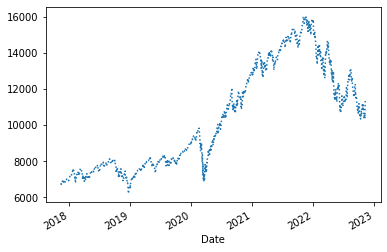

In [ ]:
y_train = df_stocks_crypto["Close NASDAQ"]
y_train.plot.line(style=":")


In [ ]:
date = y_train.index
t = date.year + (30 * (date.month - 1) + date.day) / 365
t

Float64Index([2022.8520547945207,  2022.849315068493, 2022.8465753424657,
              2022.8438356164384,  2022.841095890411, 2022.8328767123287,
              2022.8301369863013,  2022.827397260274, 2022.8246575342466,
              2022.8246575342466,
              ...
              2017.8958904109588, 2017.8876712328768, 2017.8821917808218,
              2017.8794520547945,  2017.876712328767,  2017.868493150685,
              2017.8657534246574,   2017.86301369863, 2017.8602739726027,
              2017.8575342465754],
             dtype='float64', name='Date', length=1259)

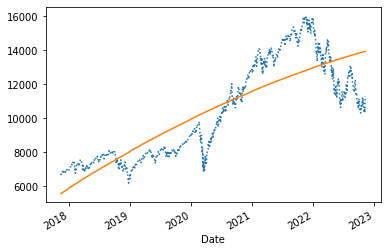

In [ ]:
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)
pipeline.fit(X=t.to_frame(), y=y_train)

# Store model predictions in a Series for easy plotting
y_train_ = pd.Series(
    pipeline.predict(X=t.to_frame()),
    index=y_train.index
)

# Plot the data and the fitted trend
y_train.plot.line(style=":")
y_train_.plot.line()

In [ ]:
pipeline.predict(
    np.array([
        [2023.0],
        [2024.0],
        [2025.0],
        [2028.0],
        [2030.0]
    ])
)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([14099.88051653, 14960.29606372, 15561.73919439, 15812.23408836,
       14684.36860251])

##SP500 FORECAST MODEL

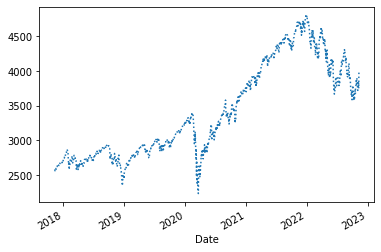

In [ ]:
y_train = df_stocks_crypto["Close SP500"]
y_train.plot.line(style=":")

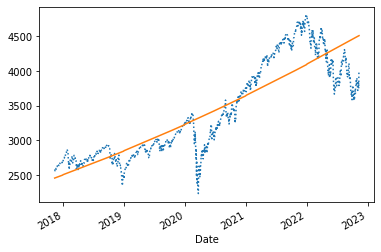

In [ ]:
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)
pipeline.fit(X=t.to_frame(), y=y_train)

# Store model predictions in a Series for easy plotting
y_train_ = pd.Series(
    pipeline.predict(X=t.to_frame()),
    index=y_train.index
)

# Plot the data and the fitted trend
y_train.plot.line(style=":")
y_train_.plot.line()

In [ ]:
pipeline.predict(
    np.array([
        [2023.0],
        [2024.0],
        [2025.0],
        [2028.0],
        [2030.0]
    ])
)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([4581.28354558, 5102.21247014, 5658.45548601, 7539.06908163,
       8969.38193536])

##ETHEREUM FORECAST MODEL (WRONG WAY TO DO IT)

This is why you cannot forecast on Purely Ethereum because it is too volatile talk about this in our presentation, so instead what we decided to do is use NASDAQ and SP500 Forecasting and then using that as our X_Train to predict Ethereum's Future Price



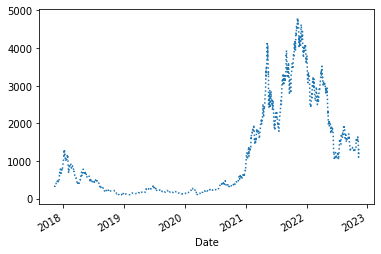

In [ ]:
y_train = df_stocks_crypto["Close ETH"]
y_train.plot.line(style=":")


In [ ]:
date = y_train.index
t = date.year + (30 * (date.month - 1) + date.day) / 365
t


Float64Index([2022.8520547945207,  2022.849315068493, 2022.8465753424657,
              2022.8438356164384,  2022.841095890411, 2022.8328767123287,
              2022.8301369863013,  2022.827397260274, 2022.8246575342466,
              2022.8246575342466,
              ...
              2017.8958904109588, 2017.8876712328768, 2017.8821917808218,
              2017.8794520547945,  2017.876712328767,  2017.868493150685,
              2017.8657534246574,   2017.86301369863, 2017.8602739726027,
              2017.8575342465754],
             dtype='float64', name='Date', length=1259)

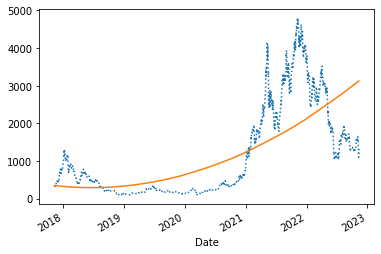

In [ ]:
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)
pipeline.fit(X=t.to_frame(), y=y_train)

# Store model predictions in a Series for easy plotting
y_train_ = pd.Series(
    pipeline.predict(X=t.to_frame()),
    index=y_train.index
)

# Plot the data and the fitted trend
y_train.plot.line(style=":")
y_train_.plot.line()


In [ ]:
pipeline.predict(
    np.array([
        [2025.0],
        [2025 + 0.5 / 365]
    ])
)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([6589.33046114, 6591.9745388 ])

##Ethereum Predicting Model Based on NASDAQ and SP500

In [ ]:
X_train = df_stocks_crypto[["Close NASDAQ",	"Close SP500"]]
y_train = df_stocks_crypto["Close ETH"]

Find the Best K Nearest Neighbors Value

19    200357.277047
18    201535.658603
17    204720.948552
16    207021.909496
15    210225.619343
14    212974.728944
13    214508.603539
12    216204.916677
11    217906.462439
10    221925.888750
9     228393.881046
8     234881.254071
7     243027.220610
6     253073.104406
5     266215.110188
4     277016.167890
3     285564.823165
1     294782.130903
2     318833.178078
dtype: float64

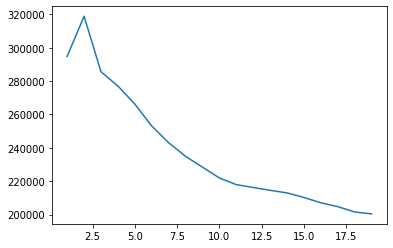

In [ ]:
def get_cv_error(k):
  # define pipeline
  pipeline = make_pipeline(
      StandardScaler(),
      KNeighborsRegressor(n_neighbors=k)
  ) 
  # calculate errors from cross-validation
  cv_errs = -cross_val_score(pipeline, X=pd.get_dummies(X_train), y=y_train,
                             scoring="neg_mean_squared_error", cv=10)
  # calculate average of the cross-validation errors
  return cv_errs.mean()
    
ks = pd.Series(range(1, 20))
ks.index = range(1, 20)
test_errs = ks.apply(get_cv_error)
test_errs.plot.line()
test_errs.sort_values()

**LINEAR AND K-NEAREST MODELS**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
 
# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X=X_train, y=y_train)
 
# Train 10-nearest neighbors model
knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=19)
)
knn_model.fit(X=X_train, y=y_train)
 
prediction_2024 = [[14960, 5102]]
linear_model.predict(prediction_2024), knn_model.predict(prediction_2024)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(array([4088.18533301]), array([3661.25467721]))

**STACKING AND ENSEMBLE MODELS**

In [ ]:
preds = np.stack([
    linear_model.predict(X_train), knn_model.predict(X_train)
], axis=1)
preds


array([[2214.38381052, 1791.82896668],
       [2163.31370349, 1674.85149189],
       [1821.76710824, 1328.31296905],
       ...,
       [-206.73067893,  308.17402932],
       [-180.84986765,  304.45090363],
       [-170.78187936,  315.80369647]])

In [ ]:
stacker = LinearRegression()
stacker.fit(X=preds, y=y_train)


LinearRegression()

In [ ]:
from sklearn.ensemble import StackingRegressor
 
stacking_model = StackingRegressor([
    ("linear", linear_model), 
    ("knn", knn_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X=X_train, y=y_train)
 
stacker = stacking_model.final_estimator_
stacker.intercept_, stacker.coef_


(86.7448769180196, array([0.13299527, 0.76387379]))

In [ ]:
from sklearn.ensemble import VotingRegressor
 
ensemble_model = VotingRegressor([
    ("linear", linear_model), 
    ("knn", knn_model)
])
ensemble_model.fit(X=X_train, y=y_train)


VotingRegressor(estimators=[('linear', LinearRegression()),
                            ('knn',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('kneighborsregressor',
                                              KNeighborsRegressor(n_neighbors=19))]))])

**SELECTING THE BEST MODEL TO USE FOR PREDICTIONS**

In [ ]:
from sklearn.model_selection import cross_val_score
 
for model in [linear_model, knn_model, ensemble_model, stacking_model]:
    print(-cross_val_score(model, X=X_train, y=y_train, cv=5,
                           scoring="neg_mean_squared_error").mean())

454085.73614020896
237952.18454781393
245614.86466934966
556835.9013569362


We see that our K Nearest Neighbors model however, after trying various predictions we decided that our Ensemble Model would be best based on other expert predictors and our beliefs

## Final Model Predictions and Final Model Plotted

In [ ]:
prediction_nasdaq_sp500 = [[14684, 8969]]
ensemble_model.predict(prediction_nasdaq_sp500)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4661.08071261])

In [ ]:
t_val =  df_stocks_crypto.index

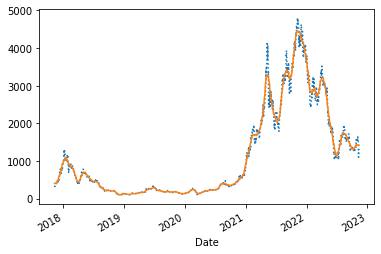

In [ ]:
from sklearn.pipeline import make_pipeline

# Fit linear regression of y on t and t^2
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    ensemble_model
)
pipeline.fit(X=t_val.to_frame(), y=y_train)

# Store model predictions in a Series for easy plotting
y_train_ = pd.Series(
    pipeline.predict(X=t_val.to_frame()),
    index=y_train.index
)

# Plot the data and the fitted trend
y_train.plot.line(style=":")
y_train_.plot.line()